In [7]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


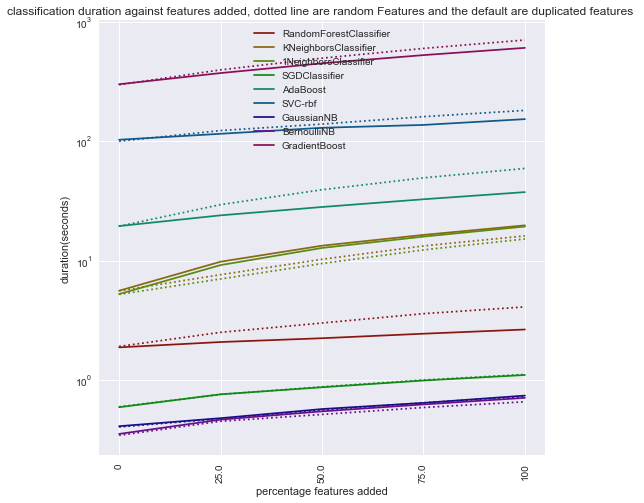

In [9]:
didList = Cat
for i in NonCat:
    Cat.append(i)
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
dur1 = []
dur2 = []
dur3 = []
typ = 0

amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func2,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis categorical and numerical classification prediction duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition. This can be explained by no increase in n_neighbors and so the algorithm making the same size tree only with more features to check.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with the categorical datasets
The lines are also a bit more steeper with the categorical datasets.
The steepest curve seems to be from the KNeighborsClassifier which has a steep increase with the 25% added features and then afterwards increases steadily.
When you compare the results of duplicate with random features, most classifiers have increase durations, however KNeighborsClassifer has a lower duration increase. This can be explained by only three categorical categories for added features. The original features have more categories which can explain more computation. 
For the randomForestClassifier there is a large increase in duration this can be explained by the variance or noise depending on how you see it. The features have no inherent predicting capabilities so finding them can be the luck of the draw. This means that the RandomForestClassifier is trying to find something that is no there. 

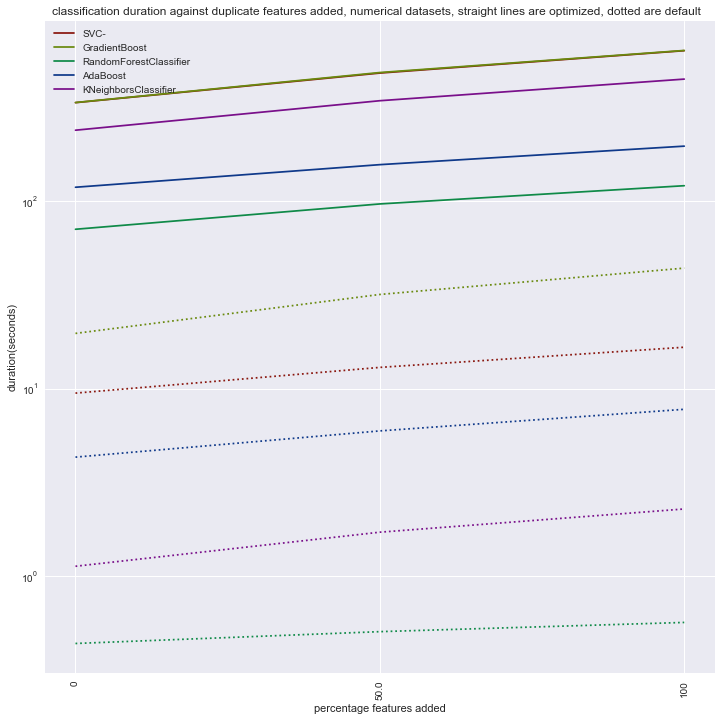

In [31]:
#print duration increase
didList = [11,
 1038,
 1043,
 1049,
 1050,
 37,
 1063,
 39,
 40,
 41,
 1067,
 1068,
 40496,
 53,
 54,
 1464,
 1467,
 40509,
 458,
 1510,
 1515]
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
clfNames = ['SVC-','GradientBoost','RandomForestClassifier', 'AdaBoost','KNeighborsClassifier']
func = 'cvScoreFeatures5'
func2 = 'cvOptScoreFeatures5'
dur1 = []
dur2 = []
dur3 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.5,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    dur3.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
        dur3[i].append(0)
    dur2[i].append(0)
    dur3[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if clfName == 'SVC-':
                clfName = 'SVC-rbf'
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)                
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            if clfName == 'SVC-rbf':
                clfName = 'SVC-'
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur3[cs][i+1] = dur3[cs][i+1] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur3[cs][0] = dur3[cs][0] + read_duration(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
            


cl = sns.hls_palette(len(dur2), l=.3, s=.8)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],ls = ':' )
    _= ax.plot(x_axis,dur3[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against duplicate features added, numerical datasets, straight lines are optimized, dotted are default  ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis duration increase
Gradient and SVC are overlapping as having nearly the same duration when optimizing. 

Most notable is the exponential increase of KNeighborsClassifier compared to the others as it overtakes AdaBoost in time and is nearing the time of GradientBoost and SVC. This increase can be explained as the optimizer increasing n_neighbors or the distance calculation mechanic.

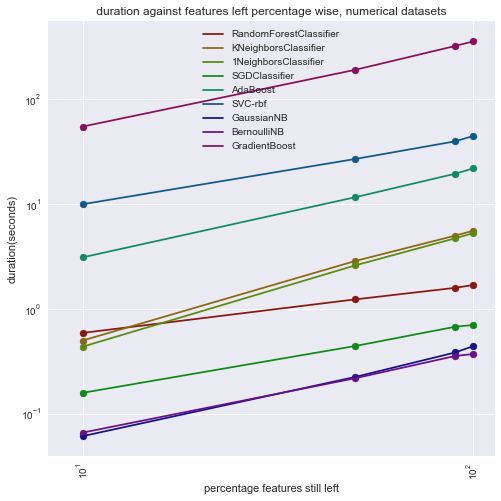

In [36]:
listDone = []
for did in NonCat:
    if readDict(did)['NumberOfFeatures'] > 30 and readDict(did)['NumberOfInstances'] < 100000:
        listDone.append(did)
func = 'removedFeatures'
didList = listDone
dur1 = []
dur2 = []
typ = 0

amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))
fig, ax = plt.subplots()
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [1,0.9,0.5,0.1]
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    ax.scatter(x_axis,dur2[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features left percentage wise, numerical datasets ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

#### duration 
Duration is calculated as classification and prediction time combined.
### Analysis duration features removed
For all classifiers a clear increase can be seen, but remarkable is the only slight increase for RandomForestClassifier as opposed to KNeighborsClassifier. This can be the influx of the features has a great effect on the prediction for KNeighborsClassifer as it has to make greater calculations 

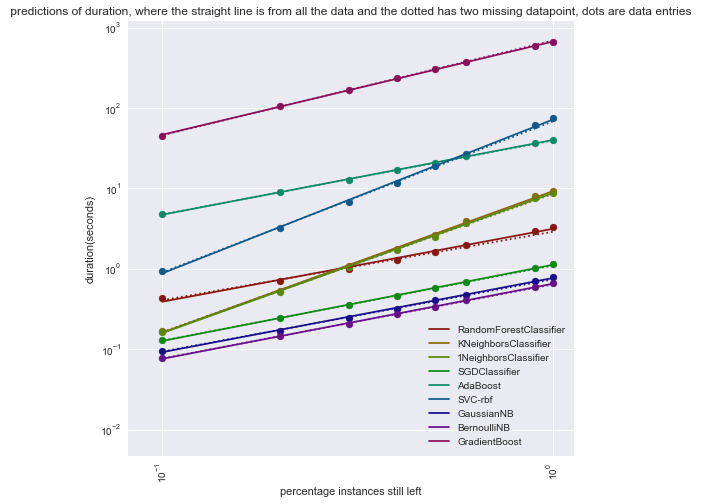

In [37]:
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier'
path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier'
listExtra = []
for did in didList:
    path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\scalability\\1NeighborsClassifier\\' + str(did)    
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            if dirname == '0.8':
                listExtra.append(did)

didList = listExtra
func = 'scalability'
# didList = listDone
dur1 = []
dur2 = []
typ = 0
amountList = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ]/len(didList)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,amount)[typ+1]/len(didList)
predisComplete = []
# amountList = [1,0.9,0.5,0.1]
amountList = [1-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[2:]),np.log(dur1[i][2:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

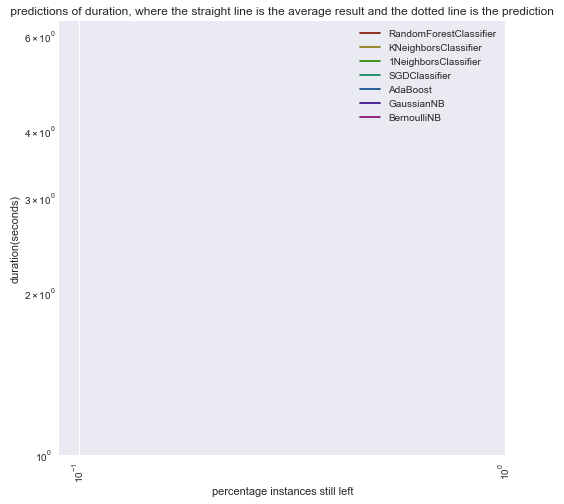

In [63]:
from sklearn.kernel_ridge import KernelRidge
listik = [953,
6,
60,
46,
4538,
4534,
44,
4135,
4134,
40706,
40702,
40697,
40696,
40695,
40687,
40680,
40677,
40670,
40668,
40664,
40656,
40655,
40654,
40653,
40652,
40651,
40650,
40649,
40648,
40647,
40646,
40645,
1022,
1036,
1038,
1043,
1049,
1050,
1067,
1068,
1120,
1176,
12,
1461,
1466,
1468,
1475,
1476]
clfName = 'KNeighborsClassifier'
func = 'scalability'
dur90 = []
dur9 = []
didList = listik
typ = 0
for k,clfName in enumerate(clfNames):
    amountList = [0.0,0.1,0.4,0.7,0.8,0.9] 
    y_train = []
    X_train = []
    y_test = []
    X_test = []
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_train.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
            X_train.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did])
    lr = KernelRidge()
    lr.fit(X_train,y_train)
    amountList = [0.0,0.1,0.4,0.5,0.6,0.7,0.8,0.9]  
    for did in didList:
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,did,amount)
            y_test.append(np.log(read_duration(func,clfName,did,amount)[typ]+read_duration(func,clfName,did,amount)[typ+1]))
            X_test.append([np.log(1-amount),readDict(did)['NumberOfInstances'],readDict(did)['NumberOfFeatures'],did])
    predictionLine = lr.predict(X_test)
    dur9.append([])
    for gluk in amountList:
        dur9[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if amount == ka[0]:
                dur9[k][j] = dur9[k][j] + np.exp(predictionLine[i])/len(didList)
    dur90.append([])
    for gluk in amountList:
        dur90[k].append(0)
    for i,ka in enumerate(X_test):
        for j,amount in enumerate(amountList):
            if amount == ka[0]:
                dur90[k][j] = dur90[k][j] + y_test[i]/len(didList)
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur90[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur9[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is the average result and the dotted line is the prediction ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage instances still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

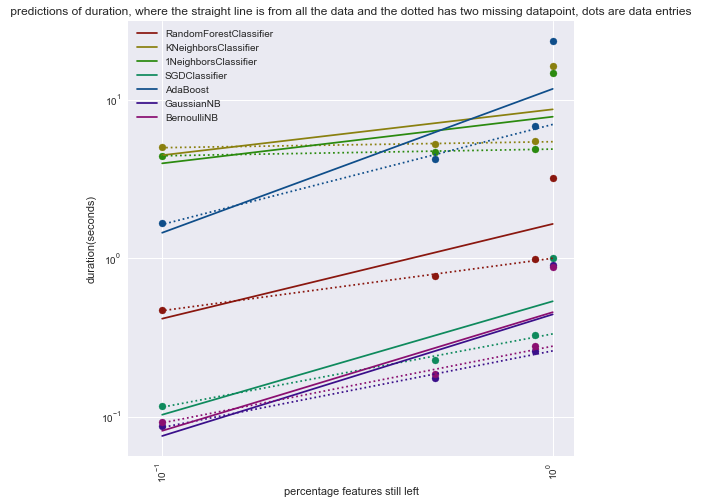

In [59]:
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
path = 'D:\\Dropbox\\Dropbox\\afstudeer\\results\\removedFeatures\\1NeighborsClassifier'
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'GaussianNB', 'BernoulliNB']
# clfNames.append('SVC-rbf')
# clfNames.append('GradientBoost')

listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
didList = listik
func = 'removedFeatures'
# didList = listDone
dur1 = []
dur2 = []
typ = 1
ty = 0
amountList = [0.1,0.5,0.9] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
    dur1[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty]/len(didList)
            dur1[cs][0] = dur1[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[ty+1]/len(didList)

            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur1[cs][i+1] = dur1[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
predisComplete = []
amountList.append(0.0)
amountList.sort()
amountList = [1.0-i for i in amountList]
x_axis = amountList
for i,clfName in enumerate(clfNames):
    predisComplete.append(np.polyfit(np.log(x_axis),np.log(dur1[i]),1))
predisIncomplete = []
for i,clfName in enumerate(clfNames):
    predisIncomplete.append(np.polyfit(np.log(x_axis[1:]),np.log(dur1[i][1:]),1))
dur7 = []
for i,fit in enumerate(predisComplete):
    dur7.append([])
    for k,value in enumerate(x_axis):
        dur7[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
dur8 = []
for i,fit in enumerate(predisIncomplete):
    dur8.append([])
    for k,value in enumerate(x_axis):
        dur8[i].append(np.exp(fit[0]*np.log(value) + fit[1]))
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
fig, ax = plt.subplots()
for i in range(0,len(dur1)):
    _= ax.plot(x_axis,dur7[i], color = cl[i],label = clfNames[i] )
    _= ax.plot(x_axis,dur8[i], color = cl[i],ls = ':' )
    _= ax.scatter(x_axis,dur1[i], color = cl[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' predictions of duration, where the straight line is from all the data and the dotted has two missing datapoint, dots are data entries ')
_=plt.ylabel('duration(seconds)')
_=plt.xlabel('percentage features still left')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [62]:
print(func,clfName,did,amount)

scalability RandomForestClassifier 1036 0.4


In [54]:
amountList.sort()

In [64]:
dur9

[[1.4752969769308975, 0, 0, 0, 0, 0, 0, 0],
 [4.7490673937393382, 0, 0, 0, 0, 0, 0, 0],
 [4.3631400407228735, 0, 0, 0, 0, 0, 0, 0],
 [1.1209482247068783, 0, 0, 0, 0, 0, 0, 0],
 [5.907465656213323, 0, 0, 0, 0, 0, 0, 0],
 [1.1039246571508545, 0, 0, 0, 0, 0, 0, 0],
 [1.0853961630336082, 0, 0, 0, 0, 0, 0, 0]]

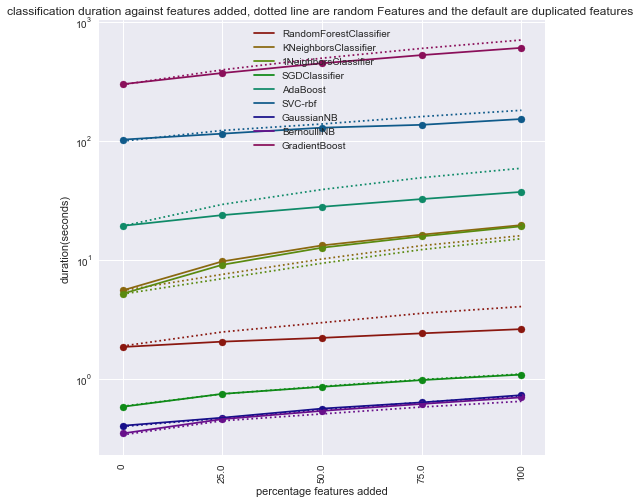

In [13]:
amountList = [0.25,0.5,0.75,1] 
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
fig, ax = plt.subplots()
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(x_axis,dur2[i], color = cl[i] )
    _= ax.plot(x_axis,dur3[i], color = cl[i],ls = ':' )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, dotted line are random Features and the default are duplicated features ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()